# Simple Machine Learning for Style classification

### ...using Scikit-Learn (RFC, SVMs, Neural Networks, KNN, SGD)

### Import Packages :

In [1]:
# loading files
import pickle
import pandas as pd
import seaborn as sns
import os
import csv
# numpy
import numpy as np
from itertools import chain
# machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# some libraries for result evaluation and visualization
from sklearn.metrics import confusion_matrix, classification_report
# rendering values to input data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# My modules
from NetworkX_GraphTranslation import CentralityPoint2D as cepo
from NetworkX_GraphTranslation import getKeyByValue
from AutoHarmonicAnalysis import GraphOfNewPiece
from GraphTrajectoryClass import *

### Delcare Functions and Construct DATA

We create a dictionary with all the file Names, it's going to be implementated in a file later on (Note all the styles already categorized are below)

Load function and Create Dictionaries

In [2]:
def loadDict(file_name) :
    complete_name = 'Comparison_Results/GraphDictionaries_TrajectoryV1/' + file_name + '.dictionary'
    graphDict = pickle.load( open( complete_name, "rb" ) )
    return graphDict

In [3]:
def composerPointsDict(method) :
    scikit_datalist = 'scikit_datalist'
    dictOfComposerPoints_mix4 = dict()
    for composer, file_name in nameDict.items() :
        datalist = []
        for graph in loadDict(file_name).values() :
            x, y, z = cepo(graph, 3, method)
            datalist.append([[composer],[x, y, z]])
    datalist = np.array(datalist)
    pickle.dump( dictOfComposerPoints_mix4, open( "Comparison_Results/GraphDictionaries_TrajectoryV1/"+ scikit_datalist + ".pkl", "wb" ) )

### Store all data to an object

In [4]:
def composerClassGraphs() :
    scikit_datalist = 'scikit_datalist'
    datalist = []
    for composer, file_name in nameDict.items() :
        for graph in loadDict(file_name).values() :
            graphcls = GraphClass(graph)
            datalist.append([composer, graphcls])
    datalist = np.array(datalist)
    pickle.dump( datalist, open( "Comparison_Results/GraphDictionaries_TrajectoryV1/"+ scikit_datalist + ".pkl", "wb" ) )

In [5]:
def transformFilesFromDirToList(directory) :
    datalist = []
    for file in os.listdir(directory):
        if file.endswith(".p") :
            complete_name = directory + '/' + file
            print('Rendering --> ', file)
            datalist.append(pickle.load( open( complete_name, "rb" ) ))
    return datalist

In [6]:
def composerPointsDict2List(composerPointsDict) :
    nl = [['COMPOSER', 'Kaltz Centrality', 'Global Clustering', 'Square Clustering', 'STYLE', 'HARMONY']]
    for composer, points in composerPointsDict.items() :
        print([composer, len(points)])
        if composer == 'bach' or composer == 'monteverdi' :
            style = 'barok'
            harmony = 'modal'
        elif composer == 'palestrina' :
            style = 'medieval'
            harmony = 'modal'
        elif composer == 'jazz' :
            style = 'jazz'
            harmony = 'chromatic'
        elif composer == 'chopin' :
            style = 'classical'
            harmony = 'chomatic'
        else :
            style = 'classical'
            harmony = 'classic'
            
        if composer == 'palestrina' :
            for index, point in enumerate(points) :
                if index < 60 :
                    x, y, z = point
                    nl.append([composer, x, y, z])
#                     nl.append([composer, x, y, z, style, harmony])
        else : 
            for point in points :
                x, y, z = point
                nl.append([composer, x, y, z])
#                 nl.append([composer, x, y, z, style, harmony])
    return np.array(nl)

In [7]:
def graphList2values(graphList) :
    nl = [['Composer', 'Name', 'Style', 'Harmony', 'Kalz Centrality', 'Global Clustering', 'Square Clustering', 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz']] #, 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz']]
    for graph in graphList :
        nl.append([graph.composer, graph.name, graph.style, graph.harmony, graph.kalz_coef, graph.glob_clust_coef, graph.square_clustering_coef, graph.harmonic_coef, graph.betweenness_coef, graph.closeness_coef, graph.trajectory.Tonnetz])
    return np.array(nl)

In [8]:
def write2csv(directory, file_name,  data):
    directory = directory + '/' + file_name + '.csv'
    with open(directory, 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(data)
    csvFile.close()

In [9]:
def graphsList2values(graphList) :
    nl1 = [['Composer', 'Name', 'Style', 'Trajectory Type', 'Kalz Centrality', 'Global Clustering', 'Square Clustering', 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz', 'Instruments']]
    nl2 = [['Composer', 'Name', 'Style', 'Trajectory Type', 'Kalz Centrality', 'Global Clustering', 'Square Clustering', 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz', 'Instruments']] 
    for graphs in graphList :
        graph, graphRec = graphs
        nl1.append([graph.composer, graph.name, graph.style, graph.trajectory.type, graph.kalz_coef, graph.glob_clust_coef, graph.square_clustering_coef, graph.harmonic_coef, graph.betweenness_coef, graph.closeness_coef, graph.trajectory.Tonnetz, graph.trajectory.instruments])
        nl2.append([graphRec.composer, graph.name, graphRec.style, graphRec.trajectory.type, graphRec.kalz_coef, graphRec.glob_clust_coef, graphRec.square_clustering_coef, graphRec.harmonic_coef, graphRec.betweenness_coef, graphRec.closeness_coef, graphRec.trajectory.Tonnetz, graphRec.trajectory.instruments])
    return np.array(nl1), np.array(nl2)

In [10]:
graphlist = transformFilesFromDirToList('Comparison_Results/GraphObjects_new')
graphList = []
for listOfGraphs in graphlist :
    graphList += listOfGraphs 
graphArray = np.array(graphList)

Rendering -->  bach.p
Rendering -->  beethoven.p
Rendering -->  beethovenCorpus.p
Rendering -->  chopin.p
Rendering -->  chopinCorpus.p
Rendering -->  jazz.p
Rendering -->  monteverdi.p
Rendering -->  mozart.p
Rendering -->  mozartCorpus.p
Rendering -->  palestrina.p
Rendering -->  schumann.p
Rendering -->  schumannCorpus.p


In [11]:
valueList1, valueList2 = graphsList2values(graphArray)

write2csv('Comparison_Results/GraphObjects_new', 'datalist_trajectory_future', valueList1)
write2csv('Comparison_Results/GraphObjects_new', 'datalist_trajectory_recursive', valueList2)

# Read Files - Begin { Prediction }

In [60]:
data = pd.read_csv('Comparison_Results/GraphObjects_new/datalist_trajectory_future.csv', sep = ',')
# data = pd.read_csv('Comparison_Results/GraphObjects_new/datalist_trajectory_recursive.csv', sep = ',')


In [61]:
data.head()

,Composer,Name,Style,Trajectory Type,Kalz Centrality,Global Clustering,Square Clustering,Harmonic Centrality,Betweenness Centrality,Closeness Centrality,Tonnetz,Instruments
0,bach,bwv1.6,barok,Trajectory With Future,0.142698,0.295513,0.309655,13.346415,0.123453,0.072150,"[3, 4, 5]","['P1: Horn 2: Instrument 7', 'P2: Soprano: Ins..."
1,bach,bwv10.7,barok,Trajectory With Future,0.213876,0.159677,0.322118,13.002381,0.115027,0.143244,"[2, 3, 7]","['P1: Soprano: ', 'P2: Alto: ', 'P3: Tenor: ',..."
2,bach,bwv101.7,barok,Trajectory With Future,0.197334,0.294286,0.402417,13.517460,0.124412,0.124101,"[3, 4, 5]","['P1: Soprano: ', 'P2: Alto: ', 'P3: Tenor: ',..."
3,bach,bwv102.7,barok,Trajectory With Future,0.209565,0.301724,0.446926,13.433333,0.086708,0.174106,"[3, 4, 5]","['P1: Soprano: ', 'P2: Alto: ', 'P3: Tenor: ',..."
4,bach,bwv103.6,barok,Trajectory With Future,0.215140,0.188172,0.305854,13.716667,0.090500,0.158646,"[2, 3, 7]","['P1: Soprano: ', 'P2: Alto: ', 'P3: Tenor: ',..."


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 12 columns):
Composer                  501 non-null object
Name                      501 non-null object
Style                     501 non-null object
Trajectory Type           501 non-null object
Kalz Centrality           501 non-null float64
Global Clustering         501 non-null float64
Square Clustering         501 non-null float64
Harmonic Centrality       501 non-null float64
Betweenness Centrality    501 non-null float64
Closeness Centrality      501 non-null float64
Tonnetz                   501 non-null object
Instruments               501 non-null object
dtypes: float64(6), object(6)
memory usage: 35.3+ KB


In [63]:
data.isnull().sum()

Composer                  0
Name                      0
Style                     0
Trajectory Type           0
Kalz Centrality           0
Global Clustering         0
Square Clustering         0
Harmonic Centrality       0
Betweenness Centrality    0
Closeness Centrality      0
Tonnetz                   0
Instruments               0
dtype: int64

###  Data DROPING :

In [64]:
data = data.drop(columns='Name')
data = data.drop(columns='Style')
data = data.drop(columns='Trajectory Type')
# data = data.drop(columns='Harmony')
# data = data.drop(columns='Harmonic Centrality')
# data = data.drop(columns='Closeness Centrality')
# data = data.drop(columns='Betweenness Centrality')
# data = data.drop(columns='Global Clustering')

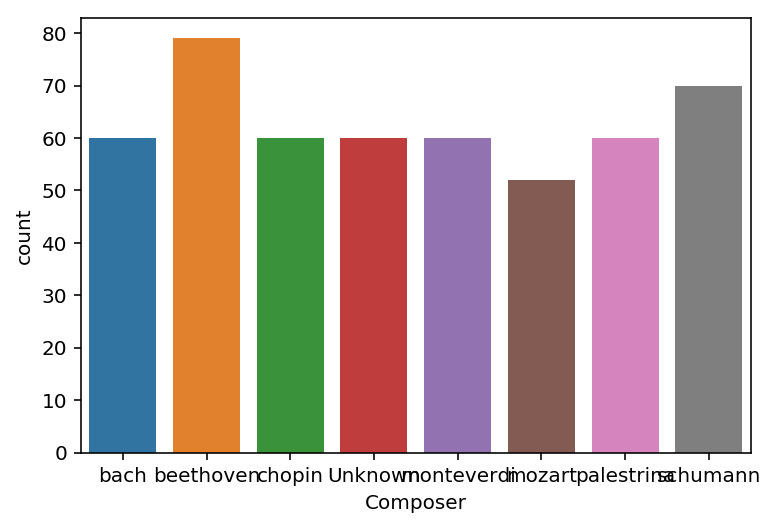

In [65]:
sns.countplot(data['Composer'])

### Encoding Labels (Enumerations)

In [66]:
label_quality = LabelEncoder()

In [67]:
# data['Name'] = label_quality.fit_transform(data['Name'])
# data['Style'] =  label_quality.fit_transform(data['Style'])
# data['Harmony'] =  label_quality.fit_transform(data['Hamrony'])
data['Instruments'] = label_quality.fit_transform(data['Instruments'])
data['Tonnetz'] =  label_quality.fit_transform(data['Tonnetz'])
data['Composer'] =  label_quality.fit_transform(data['Composer'])

In [68]:
data.head()

,Composer,Kalz Centrality,Global Clustering,Square Clustering,Harmonic Centrality,Betweenness Centrality,Closeness Centrality,Tonnetz,Instruments
0,1,0.142698,0.295513,0.309655,13.346415,0.123453,0.072150,4,74
1,1,0.213876,0.159677,0.322118,13.002381,0.115027,0.143244,3,79
2,1,0.197334,0.294286,0.402417,13.517460,0.124412,0.124101,4,79
3,1,0.209565,0.301724,0.446926,13.433333,0.086708,0.174106,4,79
4,1,0.215140,0.188172,0.305854,13.716667,0.090500,0.158646,3,79


In [69]:
data['Composer'].value_counts()

2    79
7    70
6    60
4    60
3    60
1    60
0    60
5    52
Name: Composer, dtype: int64

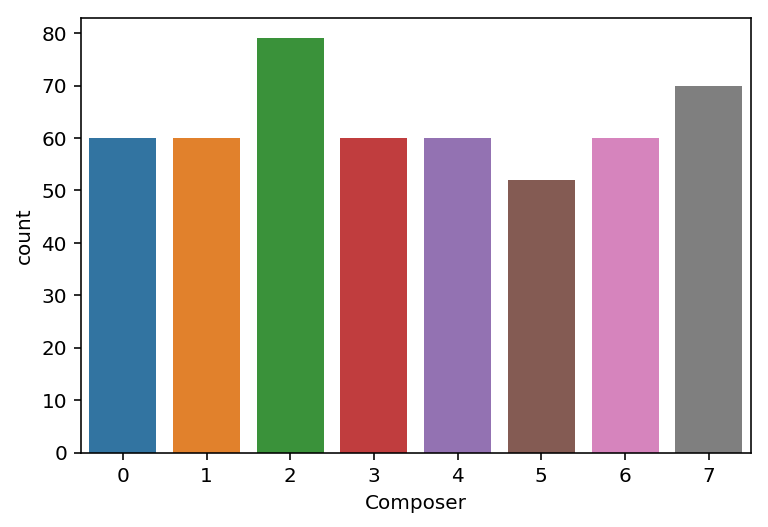

In [70]:
sns.countplot(data['Composer'])

Now lets separate the dataset as response variable and feature variables

In [71]:
X = data.drop('Composer', axis = 1)
y = data['Composer']

Train and TEst Splitting of Data

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Applying standard Scalling

In [73]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Random Forest Classifier

In [78]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

Performance report :

In [85]:
print('\033[1m' + 'RANDOM FORREST CLASSIFIER : \n\n' + 'Classification Report : \n\n'
+ '\033[0m', classification_report(y_test, pred_rfc), '\n\n' 
+ '\033[1m' + 'Confusion Matrix : \n\n'
+ '\033[0m', confusion_matrix(y_test, pred_rfc), '\n')

RANDOM FORREST CLASSIFIER : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       0.90      1.00      0.95        19
           2       0.71      0.71      0.71        17
           3       0.82      0.50      0.62        18
           4       0.88      0.94      0.91        16
           5       0.71      0.33      0.45        15
           6       1.00      0.95      0.97        19
           7       0.48      0.77      0.59        13

   micro avg       0.77      0.77      0.77       126
   macro avg       0.77      0.77      0.75       126
weighted avg       0.79      0.77      0.76       126
 

Confusion Matrix : 

 [[ 9  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0]
 [ 2  0 12  1  0  2  0  0]
 [ 1  0  0  9  0  0  0  8]
 [ 0  1  0  0 15  0  0  0]
 [ 2  1  3  0  1  5  0  3]
 [ 0  0  0  0  1  0 18  0]
 [ 0  0  2  1  0  0  0 10]] 



In [81]:
label_quality.inverse_transform([7])

array(['schumann'], dtype=object)

## SVM Classifier

In [86]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [87]:
print('\033[1m' + 'SUPPORT VECTOR MACHINE : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_clf), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_clf), '\n')

SUPPORT VECTOR MACHINE : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.50      0.89      0.64         9
           1       0.80      0.63      0.71        19
           2       0.57      0.47      0.52        17
           3       0.50      0.28      0.36        18
           4       0.54      0.88      0.67        16
           5       0.25      0.07      0.11        15
           6       0.94      0.84      0.89        19
           7       0.33      0.62      0.43        13

   micro avg       0.57      0.57      0.57       126
   macro avg       0.55      0.58      0.54       126
weighted avg       0.58      0.57      0.55       126
 

Confusion Matrix : 

 [[ 8  0  0  0  1  0  0  0]
 [ 0 12  0  0  6  1  0  0]
 [ 2  0  8  2  0  2  0  3]
 [ 3  0  0  5  1  0  0  9]
 [ 0  2  0  0 14  0  0  0]
 [ 3  1  4  1  1  1  0  4]
 [ 0  0  0  0  3  0 16  0]
 [ 0  0  2  2  0  0  1  8]] 



## Neural Network Classifier

In [90]:
mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [91]:
print('\033[1m' + 'NEURAL NETWORK CLASSIFIER : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_mlpc), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_mlpc), '\n')

NEURAL NETWORK CLASSIFIER : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.46      0.67      0.55         9
           1       0.85      0.89      0.87        19
           2       0.62      0.59      0.61        17
           3       0.46      0.33      0.39        18
           4       0.87      0.81      0.84        16
           5       0.55      0.40      0.46        15
           6       1.00      0.89      0.94        19
           7       0.33      0.54      0.41        13

   micro avg       0.65      0.65      0.65       126
   macro avg       0.64      0.64      0.63       126
weighted avg       0.67      0.65      0.65       126
 

Confusion Matrix : 

 [[ 6  0  1  1  0  1  0  0]
 [ 0 17  0  0  1  1  0  0]
 [ 3  0 10  1  0  2  0  1]
 [ 2  0  1  6  0  1  0  8]
 [ 0  2  0  0 13  0  0  1]
 [ 2  1  2  0  0  6  0  4]
 [ 0  0  0  1  1  0 17  0]
 [ 0  0  2  4  0  0  0  7]] 



## Stochastic Gradient Descent

In [92]:
from sklearn.linear_model import SGDClassifier

In [97]:
sgd = SGDClassifier(loss="log", max_iter=500).fit(X, y)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)  

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [98]:
print('\033[1m' + 'STOCHASTIC GRADIENT DESCENT : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_sgd), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_sgd), '\n')
print('\033[1m' + 'Attribute Coefficients per Label : \n')
print('\033[0m', sgd.coef_)

STOCHASTIC GRADIENT DESCENT : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.46      0.67      0.55         9
           1       0.73      0.84      0.78        19
           2       0.50      0.65      0.56        17
           3       0.38      0.28      0.32        18
           4       0.31      0.31      0.31        16
           5       0.30      0.20      0.24        15
           6       0.78      0.74      0.76        19
           7       0.17      0.15      0.16        13

   micro avg       0.49      0.49      0.49       126
   macro avg       0.45      0.48      0.46       126
weighted avg       0.47      0.49      0.48       126
 

Confusion Matrix : 

 [[ 6  0  1  1  0  1  0  0]
 [ 0 16  0  0  3  0  0  0]
 [ 2  0 11  2  0  2  0  0]
 [ 2  1  1  5  2  3  0  4]
 [ 0  4  0  0  5  0  3  4]
 [ 3  1  7  1  0  3  0  0]
 [ 0  0  0  0  3  0 14  2]
 [ 0  0  2  4  3  1  1  2]] 

Attribute Coefficients per Label : 

 [[-4.2435

## Linear and Non-Linear Regression

In [55]:
from sklearn import linear_model

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
reg.predict(X_test)

print('\033[1m' + 'LINEAR REGRESSION : \n\n' + 'Attribute Coefficients : \n')
print('\033[0m', reg.coef_, '\n')
print('\033[1m' + 'Score : \n')
print('\033[0m', reg.score(X_test, y_test))

LINEAR REGRESSION : 

Attribute Coefficients : 

 [-0.14146062 -0.16631605  0.30040837 -0.66880755  0.09333938 -0.21183518
  0.11517127  0.98972369] 

Score : 

 0.20125898686511146


In [56]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
reg.predict(X_test)

print('\033[1m' + 'LOGISTIC REGRESSION : \n\n' + 'Attribute Coefficients : \n')
print('\033[0m', reg.coef_, '\n')
print('\033[1m' + 'Score : \n')
print('\033[0m', reg.score(X_test, y_test))

LOGISTIC REGRESSION : 

Attribute Coefficients : 

 [[-0.89896817  0.66571658 -1.99269747  0.99790049  0.36937387  1.52920811
  -0.08474459 -0.61857311]
 [ 1.32888191  0.0826607   0.08333819 -2.24975473  0.51487103 -0.73797744
  -0.05522889 -1.4961171 ]
 [-0.95982282 -0.32395783  0.11405406 -0.3238684  -0.16401064 -0.86410755
   0.24249556 -0.61539314]
 [ 0.31539658 -0.85018177  0.06484526 -0.15707798 -0.03457473 -0.69167582
   0.94222383  0.96759644]
 [-1.02739629 -0.06562     0.80919206 -1.76177955  0.15862783  0.12315172
  -0.34910192  0.25793776]
 [-1.18022196 -0.1828064  -0.24504496 -0.68396645  0.2012425  -0.35893818
   0.17742911  0.38040683]
 [ 1.36944211  0.5856188  -0.50203871 -1.03990749  0.51451876 -0.76233609
  -0.06598696  1.84876875]
 [-0.38783773 -0.3216908   0.17425316 -0.19455225  0.01671986  0.34341172
   0.28080197  0.5745292 ]] 

Score : 

 0.48412698412698413


C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Nearest Centroid Classifier

In [57]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [100]:
ncc = NearestCentroid()
ncc.fit(X_train, y_train)
pred_ncc = ncc.predict(X_test)  

print('\033[1m' + 'NEAREST CENTROID CLASSIFIER : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_ncc), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_ncc), '\n')

NEAREST CENTROID CLASSIFIER : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.78      0.74      0.76        19
           2       0.57      0.47      0.52        17
           3       0.40      0.22      0.29        18
           4       0.47      0.44      0.45        16
           5       0.24      0.47      0.32        15
           6       0.76      0.84      0.80        19
           7       0.60      0.46      0.52        13

   micro avg       0.53      0.53      0.53       126
   macro avg       0.55      0.52      0.53       126
weighted avg       0.56      0.53      0.53       126
 

Confusion Matrix : 

 [[ 5  1  0  0  0  3  0  0]
 [ 0 14  0  0  3  0  1  1]
 [ 1  0  8  0  0  8  0  0]
 [ 2  0  0  4  2  9  1  0]
 [ 0  2  0  4  7  0  2  1]
 [ 1  1  5  0  0  7  0  1]
 [ 0  0  0  0  2  0 16  1]
 [ 0  0  1  2  1  2  1  6]] 



### Print Encoding of Composers

In [59]:
print('0 = ', label_quality.inverse_transform([0]))
print('1 = ', label_quality.inverse_transform([1]))
print('2 = ', label_quality.inverse_transform([2]))
print('3 = ', label_quality.inverse_transform([3]))
print('4 = ', label_quality.inverse_transform([4]))
print('5 = ', label_quality.inverse_transform([5]))
print('6 = ', label_quality.inverse_transform([6]))
print('7 = ', label_quality.inverse_transform([7]))

0 =  [0]
1 =  [1]
2 =  [2]
3 =  [3]
4 =  [4]
5 =  [5]
6 =  [6]
7 =  [7]


## Let's Plot some Stuff

In [ ]:
ax = sns.scatterplot(data['Kalz Centrality'], data['Square Clustering'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")
ax = sns.scatterplot(data['Betweenness Centrality'], data['Global Clustering'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

In [ ]:
ax = sns.scatterplot(data['Betweenness Centrality'], data['Global Clustering'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

In [ ]:
ax = sns.scatterplot(data['Harmonic Centrality'], data['Closeness Centrality'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

In [ ]:
ax = sns.scatterplot(data['Kalz Centrality'], data['Tonnetz'],  hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

In [ ]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, row='Composer', hue='Tonnetz')
g.map(plt.scatter, 'Kalz Centrality', 'Square Clustering', alpha=.7)
g.add_legend();